<p style="text-align: center;"> <span style="color:skyblue"> <font size="5"> <b> CNN Neural Network - Image Classification  </b> </font> </p> </span> 
<p style="text-align: center;"> <b> <font font size="4"> By: Kofi Buahin </p> </b></font>

## Library Imports  

In [348]:
import os
import pathlib
import pickle
import warnings
warnings.filterwarnings('ignore')


#Standard Data Science Libraries
import numpy as np
import pandas as pd

#Image Processing Relevant Tools
from PIL import Image, ImageOps
from IPython.display import display

# Machine Learning Relevant Tools
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
plt.style.use('ggplot')
rcParams['figure.figsize'] = (18, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

## Data Pre-processing

In [349]:
dir = str(pathlib.Path().resolve())
image_classes = [folder for folder in os.listdir(dir+'/natural_images') ]
image_classes

['cat', 'dog', 'person']

We don't have images of the same size so we should rescale them. We do that using functions below

In [350]:
# Containers for Numpy Arrays of Image data.
from pandas import value_counts


y_labels = []
x_data = []
val_counts = {}

# Function to Process images
def ImageProcessor(img_path):
    img = Image.open(img_path)
    img = img.resize(size=(64, 64))
    img = np.asarray(img)/ 255.0
    return img

# def FolderProcessor(label):
def FolderProcessor(label,lst):
    folder = dir + '/natural_images/{}'.format(label) 
    processed = [] # Storage container for images
    for img in os.listdir(folder): # For every image in the directory
        pic_dir = folder + '/{}'.format(img)
        processed.append(ImageProcessor(pic_dir))
        y_labels.append(label)  # Add a class column
    lst.append(processed) # Convert to pd.DataFrame
    return processed

#### Loading Data

We can now merge all the processed data into a single dataframe here:

In [ ]:
[FolderProcessor(c, x_data) for c in image_classes]

We must now split the dataset into test and train and we must also encode the target variable class

In [357]:
X_vars = np.concatenate(x_data, axis=0)
y_vars = np.array(y_labels)
print('X Data Shape: {}'.format(X_vars.shape))
print('Y Data Shape: {}'.format(y_vars.shape))

y_encoded = LabelEncoder().fit_transform(y_vars)
y_categorical = to_categorical(y_encoded)



X Data Shape: (2573, 64, 64, 3)
Y Data Shape: (2573,)


In [358]:
del x_data

In [359]:
shuffle = np.arange(X_vars.shape[0])
np.random.seed(15)
np.random.shuffle(shuffle)
X = X_vars[shuffle]
# X = np.array(X_vars[shuffle])
y = y_categorical[shuffle]


In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Exploratory Data Analysis (If Needed)

In [361]:
# class_dist = Counter(y_labels)
# class_dist = X_vars['class'].value_counts()

# fig, ax = plt.subplots()

# p = plt.barh(class_dist.index, class_dist)
# ax.set_xlabel('Class')
# ax.set_ylabel('Count of Images')
# ax.set_title('Number Pictures in Dataset by Class')

# bar_labels = class_dist # series of label
# [ax.text(v, i, v) for i, v in enumerate(bar_labels)]

# plt.title("Number Pictures in Dataset by Class", 
#           loc= 'center',
#           fontsize = 20,
#           fontweight = 'bold',
#           pad = 20, 
#           color = 'black')

# plt.show()

***Show some random pictures selected from the training set***

## Model Building

### Iteration 1 - MLP Classifier

In [363]:
tf.random.set_seed(15)

mlp_nn = tf.keras.Sequential()
mlp_nn.add(layers.Flatten(input_shape=X_train.shape[1:]))
mlp_nn.add(layers.Dense(2048, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dense(1024, activation='relu'))
mlp_nn.add(layers.Dropout(rate=0.25))
mlp_nn.add(layers.Dense(128, activation='relu'))
mlp_nn.add(layers.Dense(3, activation='softmax'))


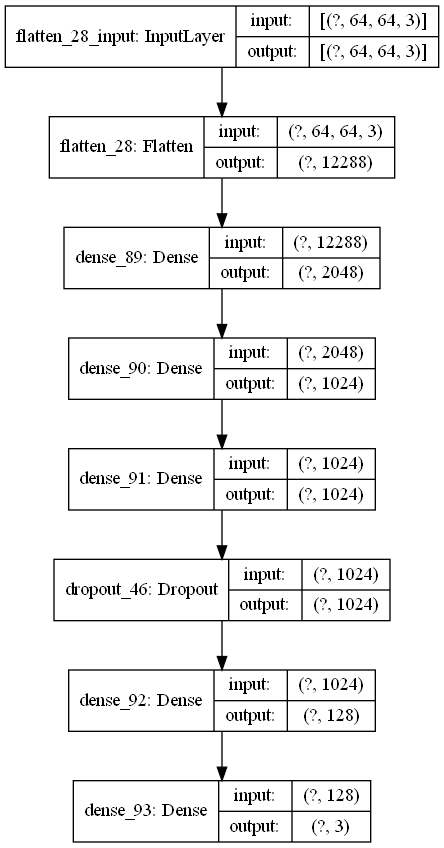

In [364]:
plot_model(mlp_nn, show_shapes = True,expand_nested = True)

In [365]:
mlp_nn.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_mlp = mlp_nn.fit(
    X_train,
    y_train,
    epochs=50,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/50
45/45 [==============================] - 9s 201ms/step - loss: 2.3671 - accuracy: 0.6412 - val_loss: 0.8198 - val_accuracy: 0.7627
Epoch 2/50
45/45 [==============================] - 9s 195ms/step - loss: 0.6780 - accuracy: 0.7731 - val_loss: 0.6147 - val_accuracy: 0.7932
Epoch 3/50
45/45 [==============================] - 9s 190ms/step - loss: 0.5531 - accuracy: 0.8088 - val_loss: 0.5344 - val_accuracy: 0.7996
Epoch 4/50
45/45 [==============================] - 9s 191ms/step - loss: 0.5128 - accuracy: 0.8183 - val_loss: 0.4701 - val_accuracy: 0.8098
Epoch 5/50
45/45 [==============================] - 9s 195ms/step - loss: 0.5265 - accuracy: 0.8120 - val_loss: 0.5097 - val_accuracy: 0.8255
Epoch 6/50
45/45 [==============================] - 10s 224ms/step - loss: 0.5001 - accuracy: 0.8199 - val_loss: 0.5123 - val_accuracy: 0.7876
Epoch 7/50
45/45 [==============================] - 11s 241ms/step - loss: 0.5067 - accuracy: 0.8176 - val_loss: 0.4566 - val_accuracy: 0.8236
Epoc

In [366]:
mlp_nn.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dense_89 (Dense)             (None, 2048)              25167872  
_________________________________________________________________
dense_90 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_91 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_46 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_93 (Dense)             (None, 3)               

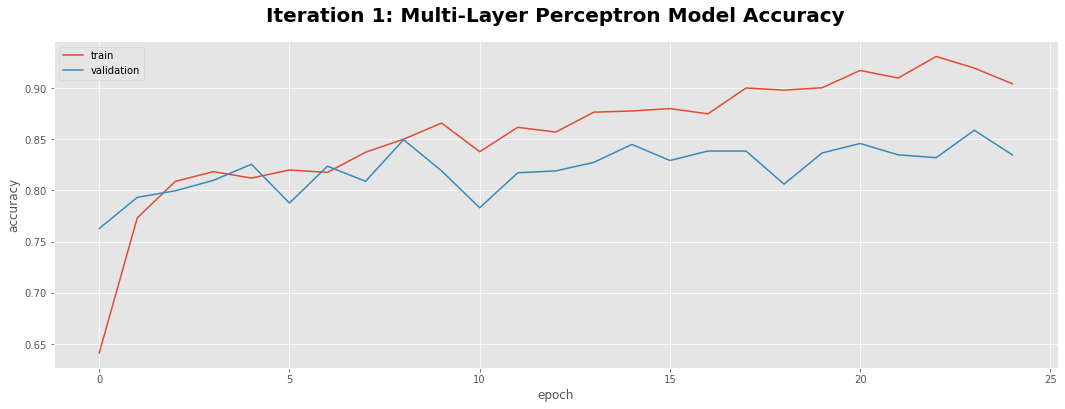

In [367]:
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


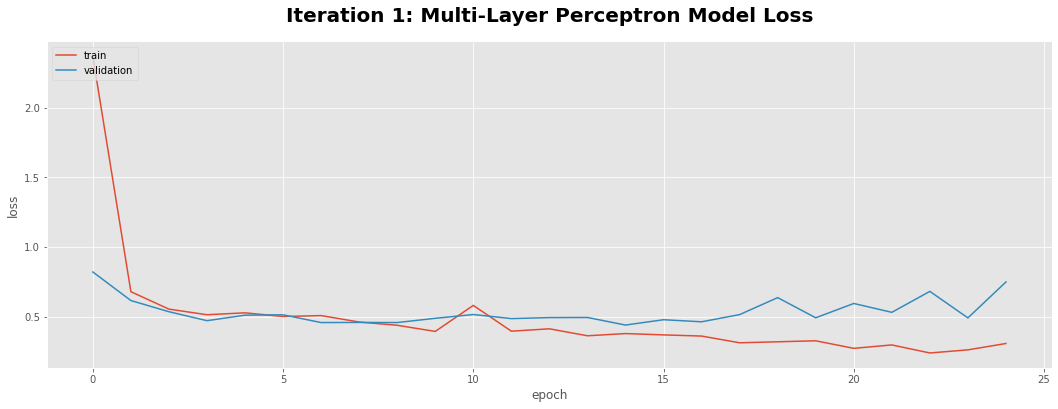

In [368]:
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title("Iteration 1: Multi-Layer Perceptron Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [369]:
loss, accuracy = mlp_nn.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


25/25 [==============================] - 2s 80ms/step - loss: 0.4658 - accuracy: 0.8454
Loss:  0.46577778458595276
Accuracy:  0.84542316198349


In [370]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7681

In [371]:
y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       269
           1       0.58      0.70      0.64       216
           2       0.97      0.98      0.97       287

    accuracy                           0.77       772
   macro avg       0.76      0.76      0.75       772
weighted avg       0.77      0.77      0.77       772



We can see the performance (precision) on the human images is significantly better on people faces versus dogs and cats....

elaborate more here

In [372]:
X_train.shape[1:]

(64, 64, 3)

### Iteration 2 - Basic Custom CNN Network Architecture

In [373]:
CNN_basic = keras.models.Sequential([
    keras.layers.Conv2D(64, 5, activation="relu",input_shape=X_train.shape[1:], padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation="softmax")
])

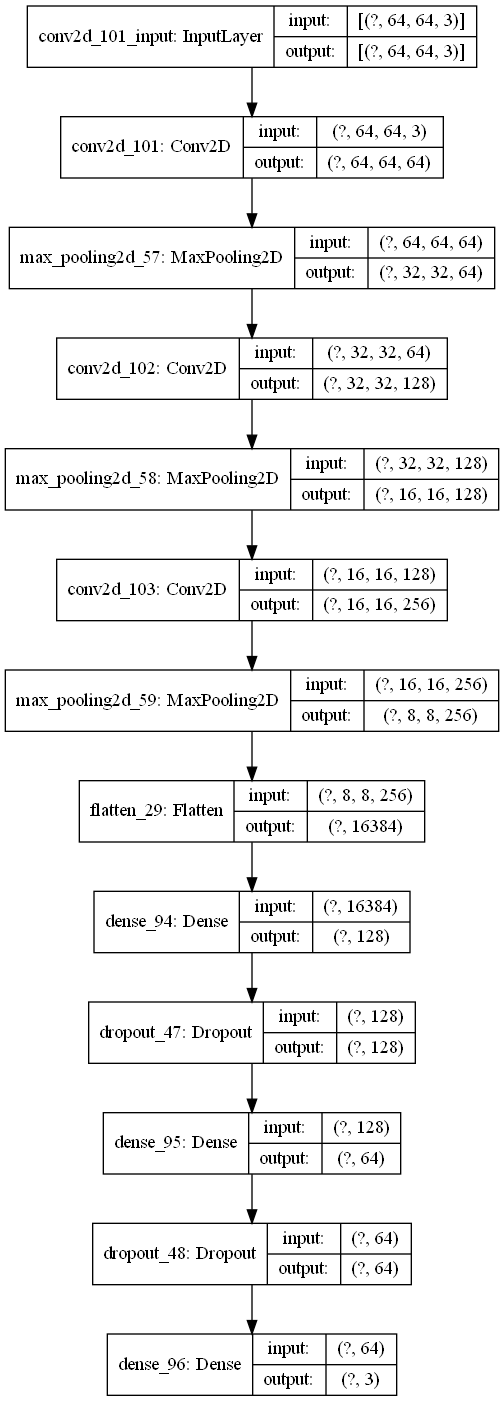

In [374]:
plot_model(CNN_basic, show_shapes = True,expand_nested = True)

In [375]:
CNN_basic.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [376]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_CNNbasic = CNN_basic.fit(
    X_train,
    y_train,
    epochs=50,
    # batch_size=128,
    validation_split= 0.2,
    callbacks = early_stopping_cb
)

Epoch 1/50
45/45 [==============================] - 35s 769ms/step - loss: 1.0403 - accuracy: 0.6963 - val_loss: 0.9208 - val_accuracy: 0.7452
Epoch 2/50
45/45 [==============================] - 34s 767ms/step - loss: 0.7555 - accuracy: 0.7632 - val_loss: 0.6086 - val_accuracy: 0.7784
Epoch 3/50
45/45 [==============================] - 44s 972ms/step - loss: 0.6458 - accuracy: 0.7926 - val_loss: 0.5435 - val_accuracy: 0.7756
Epoch 4/50
45/45 [==============================] - 41s 918ms/step - loss: 0.5740 - accuracy: 0.8037 - val_loss: 0.4803 - val_accuracy: 0.8135
Epoch 5/50
45/45 [==============================] - 39s 869ms/step - loss: 0.5497 - accuracy: 0.8106 - val_loss: 0.4762 - val_accuracy: 0.8061
Epoch 6/50
45/45 [==============================] - 48s 1s/step - loss: 0.4929 - accuracy: 0.8197 - val_loss: 0.4670 - val_accuracy: 0.8366
Epoch 7/50
45/45 [==============================] - 70s 2s/step - loss: 0.4530 - accuracy: 0.8350 - val_loss: 0.4122 - val_accuracy: 0.8846
Epoch

In [377]:
CNN_basic.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 16384)           

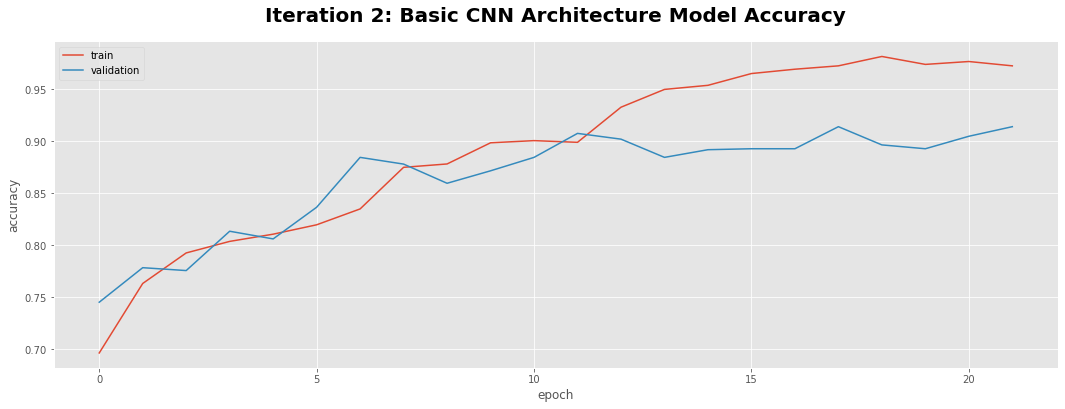

In [378]:
plt.plot(history_CNNbasic.history['accuracy'])
plt.plot(history_CNNbasic.history['val_accuracy'])
plt.title("Iteration 2: Basic CNN Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

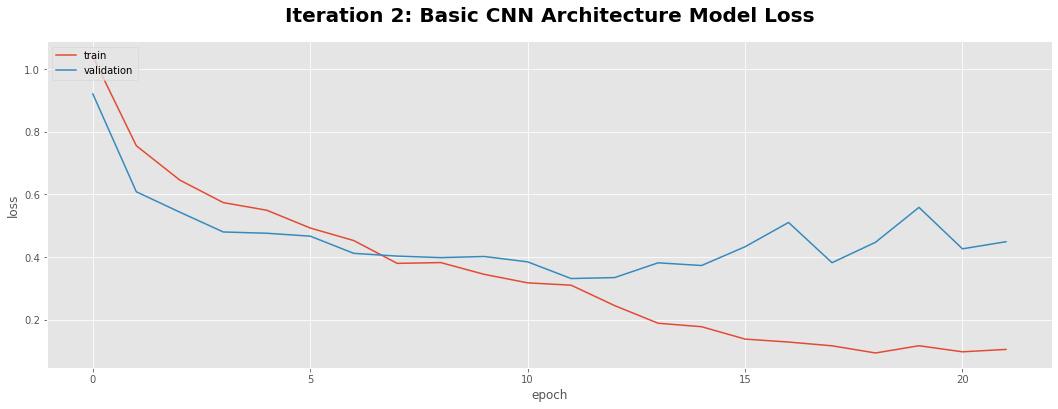

In [379]:
plt.plot(history_CNNbasic.history['loss'])
plt.plot(history_CNNbasic.history['val_loss'])
plt.title("Iteration 2: Basic CNN Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [380]:
loss, accuracy = CNN_basic.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)


25/25 [==============================] - 6s 242ms/step - loss: 0.3336 - accuracy: 0.8938
Loss:  0.33355629444122314
Accuracy:  0.8937823176383972


In [381]:
y_pred = np.argmax(CNN_basic.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.8407

In [382]:
# y_pred = np.argmax(mlp_nn.predict(X_test), axis=1)
# y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       269
           1       0.72      0.74      0.73       216
           2       0.98      0.99      0.98       287

    accuracy                           0.84       772
   macro avg       0.83      0.83      0.83       772
weighted avg       0.84      0.84      0.84       772



### Iteration 3 - Implementing Recreation of a Popular Architecture (LeNet-5 CNN)

In [383]:
LeNet_5 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, activation="tanh", input_shape=X_train.shape[1:], strides=1, padding="same"), #C1 Layer 
    keras.layers.AveragePooling2D(strides=2),                                                                           #S2 Layer
    keras.layers.Conv2D(16, kernel_size=5, activation="tanh", strides=1, padding="same"),                               #C3 Layer
    keras.layers.AveragePooling2D(strides=2),                                                                           #S4 Layer
    keras.layers.Conv2D(120, kernel_size=5, activation="tanh", strides=1, padding="same"),                              #C5 Layer
    keras.layers.Dense(84, activation="tanh"),                                                                          #F6 Layer
    keras.layers.Flatten(),                                                                                             #Flatten 
    keras.layers.Dense(3, activation="softmax")                                                                         #Output Layer
])

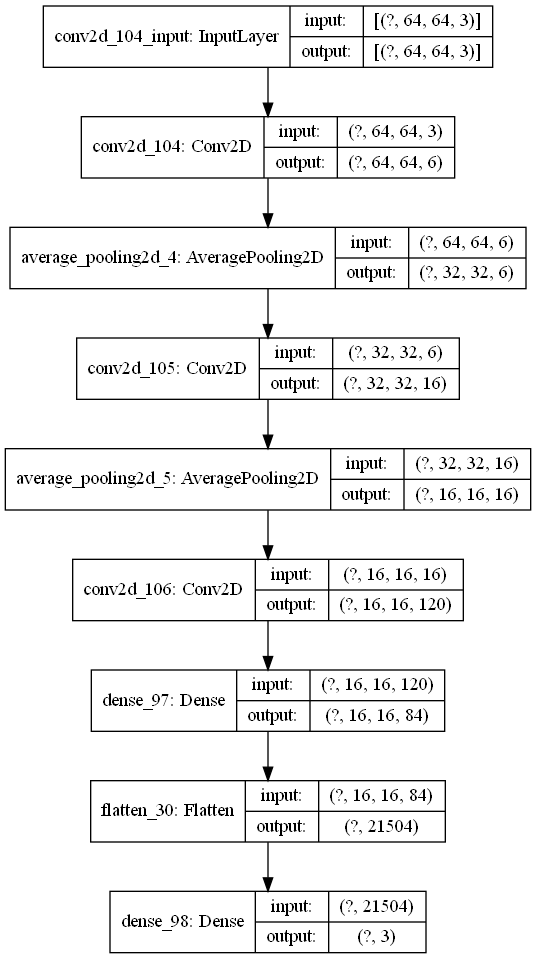

In [406]:
plot_model(LeNet_5, show_shapes = True,expand_nested = True)


In [385]:
LeNet_5.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

In [386]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_LeNet5 = LeNet_5.fit(
    X_train,
    y_train,
    epochs=50,
    # batch_size=128,
    validation_split= 0.2
    # callbacks = early_stopping_cb
)

Epoch 1/50
45/45 [==============================] - 13s 284ms/step - loss: 0.8539 - accuracy: 0.7505 - val_loss: 0.6006 - val_accuracy: 0.7738
Epoch 2/50
45/45 [==============================] - 14s 315ms/step - loss: 0.5270 - accuracy: 0.8194 - val_loss: 0.5505 - val_accuracy: 0.7941
Epoch 3/50
45/45 [==============================] - 15s 327ms/step - loss: 0.4755 - accuracy: 0.8387 - val_loss: 0.5155 - val_accuracy: 0.8135
Epoch 4/50
45/45 [==============================] - 11s 243ms/step - loss: 0.4209 - accuracy: 0.8600 - val_loss: 0.4987 - val_accuracy: 0.8255
Epoch 5/50
45/45 [==============================] - 12s 265ms/step - loss: 0.3975 - accuracy: 0.8708 - val_loss: 0.4975 - val_accuracy: 0.8412
Epoch 6/50
45/45 [==============================] - 13s 281ms/step - loss: 0.3813 - accuracy: 0.8729 - val_loss: 0.5262 - val_accuracy: 0.8199
Epoch 7/50
45/45 [==============================] - 11s 244ms/step - loss: 0.3635 - accuracy: 0.8889 - val_loss: 0.5418 - val_accuracy: 0.8218

In [387]:
LeNet_5.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 64, 64, 6)         456       
_________________________________________________________________
average_pooling2d_4 (Average (None, 32, 32, 6)         0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 32, 32, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 16, 16, 120)       48120     
_________________________________________________________________
dense_97 (Dense)             (None, 16, 16, 84)        10164     
_________________________________________________________________
flatten_30 (Flatten)         (None, 21504)           

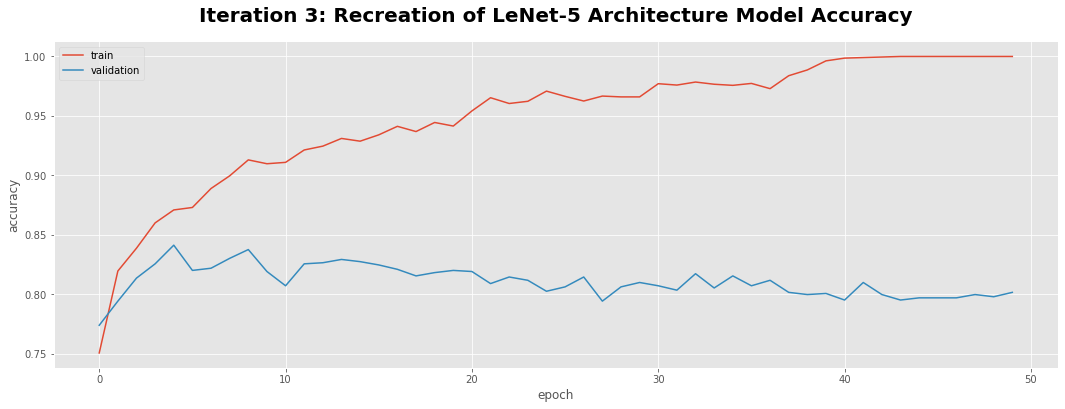

In [388]:
plt.plot(history_LeNet5.history['accuracy'])
plt.plot(history_LeNet5.history['val_accuracy'])
plt.title("Iteration 3: Recreation of LeNet-5 Architecture Model Accuracy", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

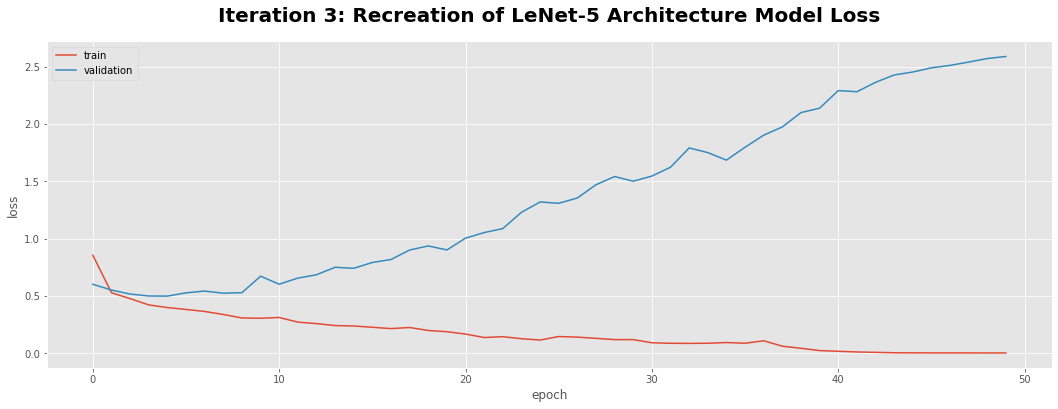

In [389]:
plt.plot(history_LeNet5.history['loss'])
plt.plot(history_LeNet5.history['val_loss'])
plt.title("Iteration 3: Recreation of LeNet-5 Architecture Model Loss", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [390]:
loss, accuracy = LeNet_5.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

25/25 [==============================] - 1s 45ms/step - loss: 2.4280 - accuracy: 0.8269
Loss:  2.427964448928833
Accuracy:  0.8268566727638245


In [391]:
y_pred = np.argmax(LeNet_5.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
round(accuracy_score(y_pred,y_test2),4)

0.7396

In [392]:
y_pred = np.argmax(LeNet_5.predict(X_test), axis=1)
y_test2 = np.argmax(y_test, axis = 1)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       269
           1       0.57      0.47      0.51       216
           2       0.95      0.98      0.96       287

    accuracy                           0.74       772
   macro avg       0.72      0.72      0.71       772
weighted avg       0.73      0.74      0.73       772



## Final Predictions: Dataset of (Un)Familiar Faces

- highlight how you have compiled dataset with some close people in your life
- Introduce them in the current setting
- make predictive model
- 

In [393]:
image_classes

['cat', 'dog', 'person']

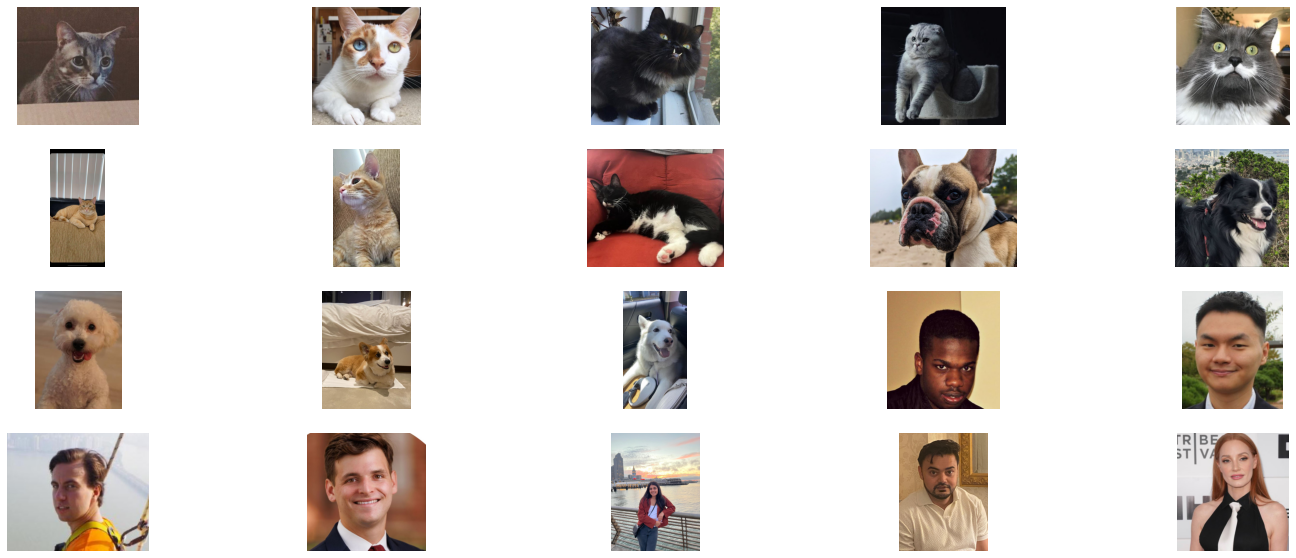

In [394]:
next_dog_pic = ['{}/prediction_images/dog/{}'.format(dir,path) for path in os.listdir('{}/prediction_images/dog'.format(dir))]
next_cat_pic = ['{}/prediction_images/cat/{}'.format(dir,path) for path in os.listdir('{}/prediction_images/cat'.format(dir))]
next_person_pic = ['{}/prediction_images/person/{}'.format(dir,path) for path in os.listdir('{}/prediction_images/person'.format(dir))]
# next_animal_pic = next_dog_pic + next_cat_pic

plt.figure(figsize=(25,10))
for i, img_path in enumerate(next_cat_pic + next_dog_pic + next_person_pic):
    ax = plt.subplot(4, 5, i+1)
    ax.axis('off')
    img = plt.imread(img_path)
    plt.imshow(img)

In [395]:
valid_labels = []
valid_data = []

def FolderProcessor2(label,lst):
    folder = dir + '/prediction_images/{}'.format(label) 
    processed = [] # Storage container for images
    for img in os.listdir(folder): # For every image in the directory
        pic_dir = folder + '/{}'.format(img)
        processed.append(ImageProcessor(pic_dir))
        valid_labels.append(label)  # Add a class column
    lst.append(processed) # Convert to pd.DataFrame
    return processed

In [396]:
[FolderProcessor2(c, valid_data) for c in image_classes]

[[array([[[0.36078431, 0.27058824, 0.22352941],
          [0.34117647, 0.2627451 , 0.21176471],
          [0.34509804, 0.26666667, 0.22352941],
          ...,
          [0.32941176, 0.25098039, 0.21568627],
          [0.3372549 , 0.25490196, 0.22352941],
          [0.34901961, 0.25098039, 0.22352941]],
  
         [[0.36078431, 0.27058824, 0.21960784],
          [0.34117647, 0.25882353, 0.21568627],
          [0.3372549 , 0.25882353, 0.23137255],
          ...,
          [0.3254902 , 0.24705882, 0.21176471],
          [0.3372549 , 0.25490196, 0.21960784],
          [0.3372549 , 0.23921569, 0.21176471]],
  
         [[0.36078431, 0.27058824, 0.21568627],
          [0.34509804, 0.2627451 , 0.21568627],
          [0.34509804, 0.2627451 , 0.23529412],
          ...,
          [0.32941176, 0.25098039, 0.21176471],
          [0.3372549 , 0.25882353, 0.21568627],
          [0.33333333, 0.25490196, 0.21960784]],
  
         ...,
  
         [[0.76470588, 0.68235294, 0.6       ],
          [0.7

In [397]:
X_valid = np.concatenate(valid_data, axis=0)
y_valid = np.array(valid_labels)
print('Friend Picture Data Shape: {}'.format(X_valid.shape))
print('Friend Class Data Shape: {}'.format(y_valid.shape))

y_answers = LabelEncoder().fit_transform(y_valid)
y_answers_cat  = to_categorical(y_answers)

Friend Picture Data Shape: (20, 64, 64, 3)
Friend Class Data Shape: (20,)


In [398]:
image_classes

['cat', 'dog', 'person']

In [414]:
shuffle = np.arange(X_valid.shape[0])
np.random.seed(15)
np.random.shuffle(shuffle)
X_ = X_valid[shuffle]
y_ = y_answers_cat[shuffle]
friend_classes_enc = np.argmax(y_, axis = 1)

Predictions with ANN

In [415]:
mlp_nn.evaluate(X_,y_)

1/1 [==============================] - 0s 2ms/step - loss: 1.6393 - accuracy: 0.5667


[1.6392812728881836, 0.5666667222976685]

In [416]:
mlp_preds = np.argmax(mlp_nn.predict(X_), axis=1)

print("Predicted Classes:{}".format(mlp_preds))
print("Actual Classes:   {}".format(friend_classes_enc))
print("Accuracy Score: {}%".format(round(accuracy_score(mlp_preds,friend_classes_enc),4)*100))

Predicted Classes:[1 1 1 0 1 0 1 2 2 0 1 1 1 1 1 1 1 1 0 1]
Actual Classes:   [2 2 0 1 0 0 1 2 2 0 0 2 2 0 1 2 0 0 1 1]
Accuracy Score: 35.0%


Predictions with Basic CNN

In [417]:
CNN_basic.evaluate(X_,y_)

1/1 [==============================] - 0s 3ms/step - loss: 1.7381 - accuracy: 0.6333


[1.7380998134613037, 0.6333333253860474]

In [418]:
cnnbasic_preds = np.argmax(CNN_basic.predict(X_), axis=1)

print("Predicted Classes:{}".format(cnnbasic_preds))
print("Actual Classes:   {}".format(friend_classes_enc))
print("Accuracy Score: {}%".format(round(accuracy_score(cnnbasic_preds,friend_classes_enc),4)*100))

Predicted Classes:[1 1 1 1 1 0 1 2 2 1 0 1 2 1 1 0 0 1 0 0]
Actual Classes:   [2 2 0 1 0 0 1 2 2 0 0 2 2 0 1 2 0 0 1 1]
Accuracy Score: 45.0%


Predictions with LeNet-5

In [419]:
LeNet_5.evaluate(X_,y_)

1/1 [==============================] - 0s 997us/step - loss: 6.7783 - accuracy: 0.5667


[6.778315544128418, 0.5666667222976685]

In [420]:
LeNet_5_preds = np.argmax(LeNet_5.predict(X_), axis=1)

print("Predicted Classes:{}".format(cnnbasic_preds))
print("Actual Classes:   {}".format(friend_classes_enc))
print("Accuracy Score: {}%".format(round(accuracy_score(LeNet_5_preds,friend_classes_enc),4)*100))

Predicted Classes:[1 1 1 1 1 0 1 2 2 1 0 1 2 1 1 0 0 1 0 0]
Actual Classes:   [2 2 0 1 0 0 1 2 2 0 0 2 2 0 1 2 0 0 1 1]
Accuracy Score: 35.0%
